In [1]:
# ---------------------------------------------------------------------------------------------------------------------- #
#                        THIS PROGRAM WILL GIVE YOU A GRAPH OF THE RANKS OF A SONG OVER TIME                             #
# ---------------------------------------------------------------------------------------------------------------------- #

In [2]:
import pandas as pd

df = pd.read_csv(r'Hot Stuff.csv')

In [3]:
# chose columns, convert to datetime, and sort
df = df[['SongID', 'WeekID', 'Week Position']]
df['WeekID'] = pd.to_datetime(df['WeekID'])

df = df.sort_values(by='WeekID')

In [4]:
# function that graphs the ranks of a song over time
def graph_song(song, artist, df):
    songFilter = df.loc[df['SongID'] == song + artist]

# filling in all the missing weeks so you will have gaps where the song is not on the charts
    r = pd.date_range(start=songFilter.WeekID.min(), end=songFilter.WeekID.max(), freq='7D')
    songFilter.set_index(['WeekID'], inplace=True)
    songFilter = songFilter.reindex(r).rename_axis('WeekID').reset_index()
    
# creating the graph
    songGraph = songFilter.plot(x='WeekID', y='Week Position', figsize=(15, 10))
    songGraph.set_ylim(100, 0)
    
    return songGraph

Enter a song. Radioactive
Enter an artist. Imagine Dragons


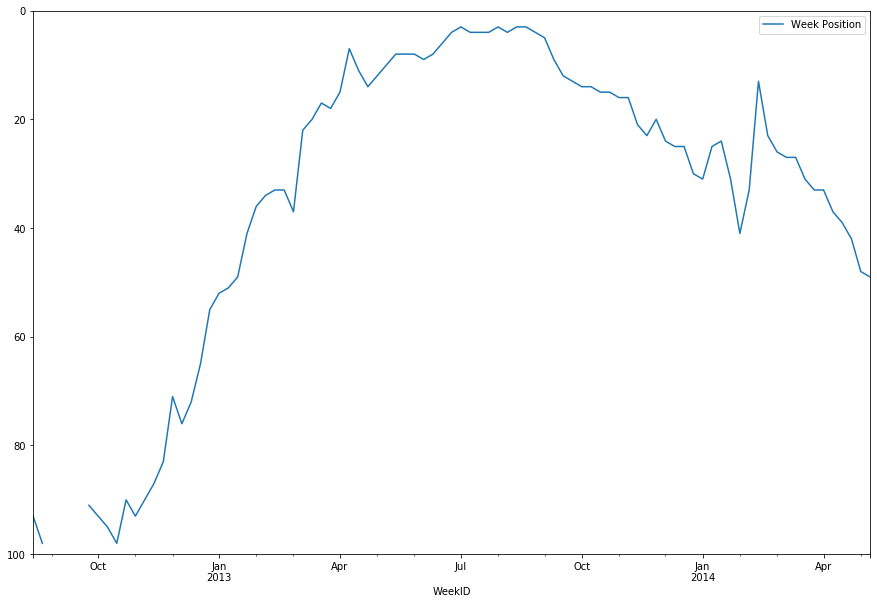

In [5]:
song = input('Enter a song. ')
artist = input('Enter an artist. ')
graph_song(song, artist, df)